In [ ]:
''' Importar librerias '''

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, timedelta
from pandas import DataFrame
from time import time


import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

In [ ]:
''' Importar dataset proyecto '''
url = 'https://taylorinteractivo.com.co/proyecto-supermercado/data-v3.csv'
dataset = pd.read_csv(url, delimiter=',', encoding= 'latin-1')
dataset['fecha'] = dataset['fecha'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))

In [ ]:
''' Seleccionamos los datos a utilizar del dataset '''

#filtramos el producto deseado
df = dataset[dataset["descrip"] == "ARROZ DIANA 500 GR"]
df_p=pd.DataFrame(df.groupby(['fecha'])['cantidad'].agg('sum'))


In [ ]:
''' genera los dias faltantes en cero '''
df_prueba=df.groupby(['fecha'])['cantidad'].agg('sum')
#df_p=df_p.squeeze(axis=0)
fin=len(df_prueba)-1

idx = pd.date_range(df_prueba.index[0], df_prueba.index[fin])

In [ ]:
df_prueba.index = pd.DatetimeIndex(df_prueba.index)
df_prueba = df_prueba.reindex(idx, fill_value=0)
df_p=pd.DataFrame(df_prueba)

In [ ]:
''' dividimos el tren de datos en entrenamiento y test '''
train= df_p.iloc[:len(df_p)-30].values
test=df_p.iloc[len(df_p)-30:].values

In [ ]:
# escalamos nuestro set de datos entre 0 y 1

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(train)
test_set_scaled = sc.fit_transform(test)


In [ ]:
#Creación de una estructura de datos con 60 pasos de tiempo y 1 salida
pasos=30
tamaño=len(training_set_scaled)

X_train = []
y_train = []
for i in range(pasos, tamaño):
    X_train.append(training_set_scaled[i-pasos:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
# redimension de los datos
X_train = np.reshape (X_train, (X_train.shape[0], X_train.shape[1],1))

In [ ]:
##############################################
#        Cracion de modelo                   #
#                                            #
##############################################
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dense 
from keras.layers import LSTM
from keras.layers import Dropout
from tensorflow.keras.layers import LeakyReLU

In [ ]:
'''Definimos el modelo'''
model = Sequential()
#model.add(LSTM(128,input_shape = (X_train.shape[1],1)))
model.add(LSTM(128,return_sequences = True,input_shape = (X_train.shape[1],1)))
model.add(LSTM(units = 64 , return_sequences = True))
model.add(LSTM(units = 50 , return_sequences = True))
model.add(LSTM(units = 50))
model.add(Dense(units = 1))
model.compile(optimizer='adam',loss='mse',metrics=['acc'])

In [ ]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_26 (LSTM)              (None, 30, 128)           66560     
                                                                 
 lstm_27 (LSTM)              (None, 30, 64)            49408     
                                                                 
 lstm_28 (LSTM)              (None, 30, 50)            23000     
                                                                 
 lstm_29 (LSTM)              (None, 50)                20200     
                                                                 
 dense_16 (Dense)            (None, 1)                 51        
                                                                 
Total params: 159,219
Trainable params: 159,219
Non-trainable params: 0
_________________________________________________________________


In [ ]:
tiempo_inicial = time() 
history =model.fit(X_train, y_train, epochs = 20, batch_size = 5)
tiempo_final = time() 
tiempo_ejecucion = tiempo_final - tiempo_inicial
print('El tiempo, en min, de ejecucion fue:%s'% str(tiempo_ejecucion/60))

Epoch 1/20
130/130 [==============================] - 11s 34ms/step - loss: 0.0146 - acc: 0.0650
Epoch 2/20
130/130 [==============================] - 4s 34ms/step - loss: 0.0142 - acc: 0.0650
Epoch 3/20
130/130 [==============================] - 4s 35ms/step - loss: 0.0144 - acc: 0.0650
Epoch 4/20
130/130 [==============================] - 4s 35ms/step - loss: 0.0142 - acc: 0.0650
Epoch 5/20
130/130 [==============================] - 5s 35ms/step - loss: 0.0141 - acc: 0.0650
Epoch 6/20
130/130 [==============================] - 4s 34ms/step - loss: 0.0142 - acc: 0.0650
Epoch 7/20
130/130 [==============================] - 4s 34ms/step - loss: 0.0142 - acc: 0.0650
Epoch 8/20
130/130 [==============================] - 4s 35ms/step - loss: 0.0141 - acc: 0.0650
Epoch 9/20
130/130 [==============================] - 4s 35ms/step - loss: 0.0141 - acc: 0.0650
Epoch 10/20
130/130 [==============================] - 5s 35ms/step - loss: 0.0141 - acc: 0.0650
Epoch 11/20
130/130 [=================

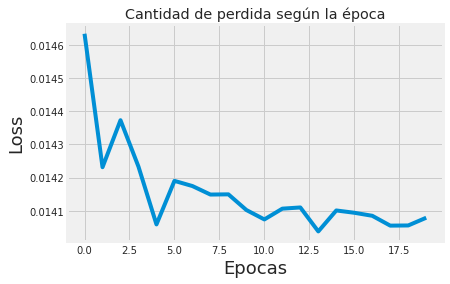

In [ ]:
plt.title('Cantidad de perdida según la época')
plt.plot(history.history['loss'], label='train')
plt.xlabel('Epocas', fontsize=18)
plt.ylabel('Loss', fontsize=18)
plt.show()

In [ ]:
M6=history.history['loss']

In [ ]:
data=[M1,M2,M3,M4,M5,M6]

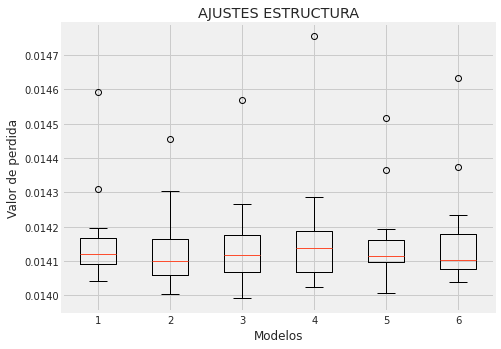

In [ ]:
#plot_loss_and_accuracy(history)
fig = plt.figure(figsize =(6, 4)) 

ax = fig.add_axes([0, 0, 1, 1]) 
bp = ax.boxplot(data)
plt.title("AJUSTES ESTRUCTURA")
plt.xlabel("Modelos")   
plt.ylabel("Valor de perdida")   
plt.show() 

In [ ]:
import statistics
mean = statistics.median(M6)
print(mean)


0.014104300178587437


In [ ]:
#Obtención del precio de las ventas previsto para los 30 dias despues
dataset_total = df_p['cantidad']
inputs = dataset_total[len(dataset_total) - len(test) - pasos: ].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
lims=pasos+len(test)

for i in range(pasos,lims ):
    X_test.append(inputs[i-pasos:i, 0])
    
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

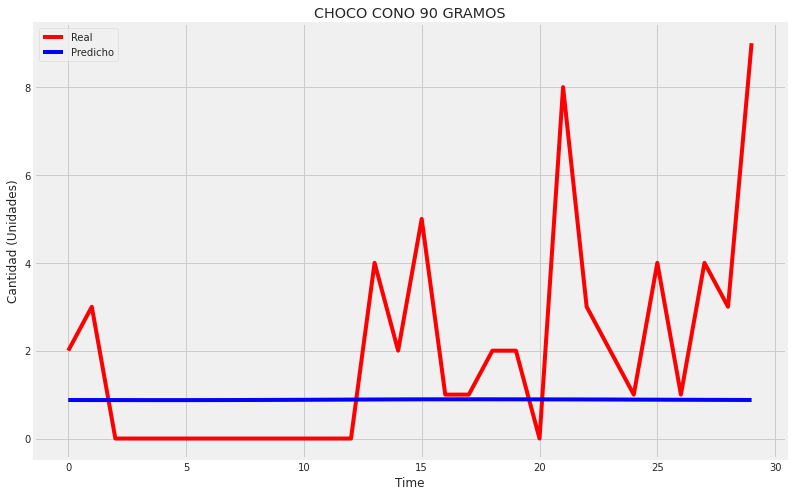

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(test, color = 'red', label = 'Real')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicho')
plt.title('CHOCO CONO 90 GRAMOS')
plt.xlabel('Time')
plt.ylabel('Cantidad (Unidades)')
plt.legend()
plt.show()

In [ ]:
df_results=pd.DataFrame(test,columns=["Real"],index=df_p.iloc[len(df_p)-30:].index)
df_results["Pronosticado"]=predicted_stock_price
df_results

In [ ]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(test, predicted_stock_price))
print(rmse)

2.526356253027948


In [ ]:
train2= df_p.iloc[:len(df_p)-30]
test2=df_p.iloc[len(df_p)-30:]

In [ ]:
# transformamos entremaniento en meses 
df_p=df_p.rename_axis('Fecha').reset_index()
df_pm=df_p.groupby(df_p['Fecha'].dt.strftime('%Y%m'))['cantidad'].sum()
df_pm=pd.DataFrame(df_pm)

In [ ]:
test2['Predichos']=predicted_stock_price

In [ ]:
# transformamos entremaniento en meses 
test2=test2.rename_axis('Fecha').reset_index()
test2m=test2.groupby(test2['Fecha'].dt.strftime('%Y%m'))['Predichos'].sum()
test2m=pd.DataFrame(test2m)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Unrecognized location 'Left corner'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  import sys


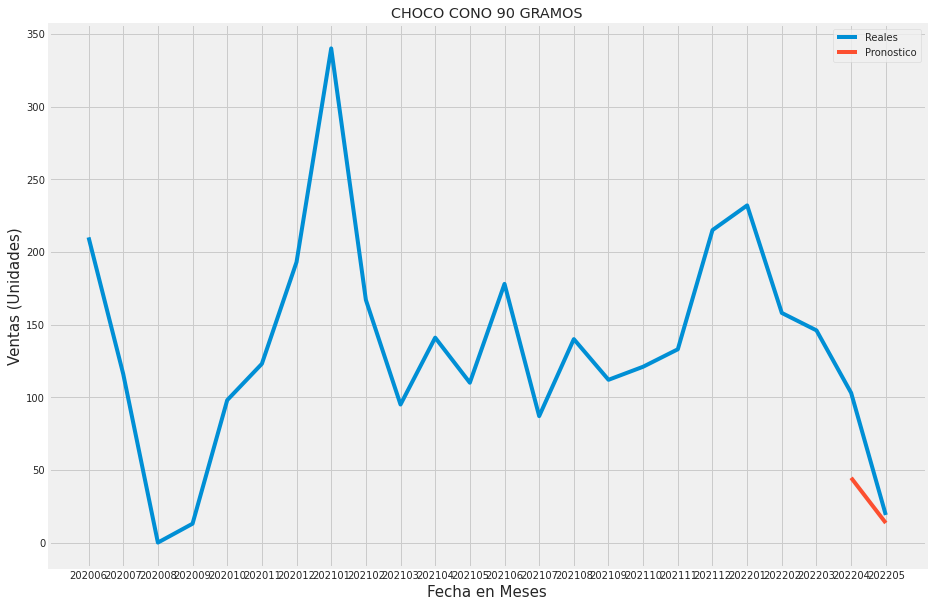

In [ ]:
plt.figure(figsize=(14,10))
plt.title('CHOCO CONO 90 GRAMOS')
plt.plot(df_pm,label="Reales")
plt.plot(test2m,label="Pronostico")
plt.xlabel('Fecha en Meses', fontsize=15)
plt.ylabel('Ventas (Unidades)', fontsize=15)
plt.legend(loc='Left corner')
plt.show()

In [ ]:
##############################################
#        Ajuste de modelo                   #
#                                            #
##############################################

from sklearn.model_selection import GridSearchCV
from time import time

In [ ]:

def build_regressor(optimizer):
  regressor = Sequential()
  regressor.add(LSTM(units = 128, return_sequences = True, input_shape = (X_train.shape[1], 1)))
  regressor.add(LSTM(units = 64, return_sequences = True))
  regressor.add(LSTM(units = 50, return_sequences = True))
  regressor.add(LSTM(units = 50))
  regressor.add(Dense(units = 1))
  regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

  return regressor


In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')
regressor = KerasClassifier(build_fn = build_regressor)

In [ ]:
parameters = {
    'batch_size' : [5,10,15,20,25,32],
    'nb_epoch' : [10,20,50,100], 
    'optimizer' : ['SGD', 'RMSprop','Adam','Adadelta','Adagrad','Adamax','Nadam']
}


In [ ]:
grid_search = GridSearchCV(estimator = regressor, 
                           param_grid = parameters, 
                           scoring = 'neg_mean_squared_error', 
                           cv = 10)
tiempo_inicial = time() 
grid_search = grid_search.fit(X_train, y_train)


tiempo_final = time() 
tiempo_ejecucion = tiempo_final - tiempo_inicial
print('El tiempo, en min, de ejecucion fue:%s'% str(tiempo_ejecucion/60))

dfR = pd.DataFrame(grid_search.cv_results_)
dfR.to_excel(r'R_LSTM_CHOCO_CONO.xlsx')
dfR.tail(3)

best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

NameError: ignored

In [ ]:
dfR = pd.DataFrame(grid_search.cv_results_)
dfR.to_excel(r'R_LSTM_Modelos.xlsx')
dfR.tail(3)

best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

In [ ]:
print("Mejores Parametros :",best_parameters)
print("Mejores Metricas :", best_accuracy)

Mejores Parametros : {'batch_size': 5, 'nb_epoch': 10, 'optimizer': 'SGD'}
Mejores Metricas : -0.02172631943973283
